In [ ]:
import tensorflow as tf
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import regularizers

In [ ]:
# Tentukan path ke direktori dataset
dataset_dir = 'C:\\Users\\Rahina\\Documents\\Machine Learning\\Modul 5\\Dataset\\rps'

# Daftar direktori yang berisi data TRAIN, TEST, dan PENGUJIAN
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'val')

In [ ]:
# Persiapkan data dengan menggunakan ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

In [ ]:
# Parameter
batch_size = 32
img_size = (299, 299)

In [ ]:
# Data Augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Rescale untuk validation dan test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk data validasi
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk data test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 2142 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 378 images belonging to 3 classes.


In [ ]:
# Model InceptionV3 pre-trained
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299, 299, 3),
    pooling='avg'
)

In [ ]:
# Menambahkan layer klasifikasi di atas InceptionV3
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
# Membekukan layer InceptionV3 agar tidak terupdate saat pelatihan
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tempat menyimpan model terbaik
model_checkpoint = ModelCheckpoint(
    filepath='C:\\Users\\Rahina\\Documents\\Machine Learning\\Modul 5\\Best Model\\inception_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

In [ ]:
# Pelatihan model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.8417
Epoch 1: val_accuracy improved from -inf to 0.92593, saving model to C:\Users\Rahina\Documents\Machine Learning\Modul 5\Best Model\inception_model.h5


C:\Users\Rahina\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 102s 1s/step - loss: 0.4944 - accuracy: 0.8417 - val_loss: 0.3342 - val_accuracy: 0.9259
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9841
Epoch 2: val_accuracy improved from 0.92593 to 0.93122, saving model to C:\Users\Rahina\Documents\Machine Learning\Modul 5\Best Model\inception_model.h5
67/67 [==============================] - 95s 1s/step - loss: 0.1462 - accuracy: 0.9841 - val_loss: 0.2578 - val_accuracy: 0.9312
Epoch 3/10
67/67 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9925
Epoch 3: val_accuracy did not improve from 0.93122
67/67 [==============================] - 96s 1s/step - loss: 0.0875 - accuracy: 0.9925 - val_loss: 0.3287 - val_accuracy: 0.8624
Epoch 4/10
67/67 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9930
Epoch 4: val_accuracy improved from 0.93122 to 0.93386, saving model to C:\Users\Rahina\Documents\Machine Learning\Modul 5\Bes

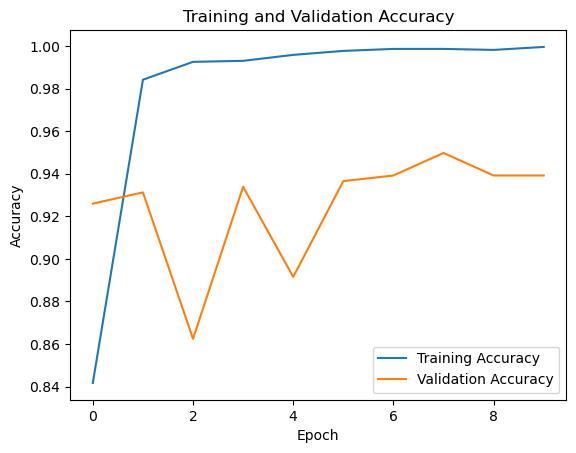

In [ ]:
# Tampilkan grafik akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

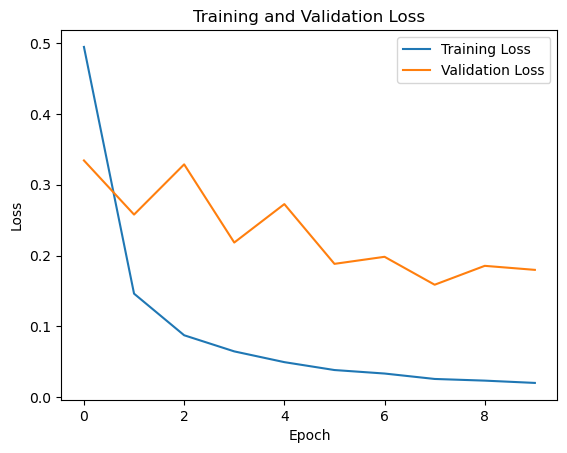

In [ ]:
# Tampilkan grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Memuat model terbaik
best_model = keras.models.load_model('C:\\Users\\Rahina\\Documents\\Machine Learning\\Modul 5\\Best Model\\inception_model.h5')

In [ ]:
# Evaluasi model menggunakan data test
test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

378/378 [==============================] - 26s 67ms/step - loss: 0.0290 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
# Ambil true classes
y_true = test_generator.classes

# Ubah kelas menjadi nama kelas
class_labels = list(test_generator.class_indices.keys())

# Prediksi kelas
y_pred = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_true) == len(y_pred_classes):
    # classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))
else:
    print("Error: Number of samples in y_true and y_pred_classes are not consistent.")

378/378 [==============================] - 26s 66ms/step
Classification Report:
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       126
        rock       1.00      1.00      1.00       126
    scissors       1.00      1.00      1.00       126

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378

